[0.45152549 0.17177931 0.08903192 0.06083723 0.04178538 0.02530454
 0.02020312 0.01739191]
[0 0 0 ... 0 0 0]


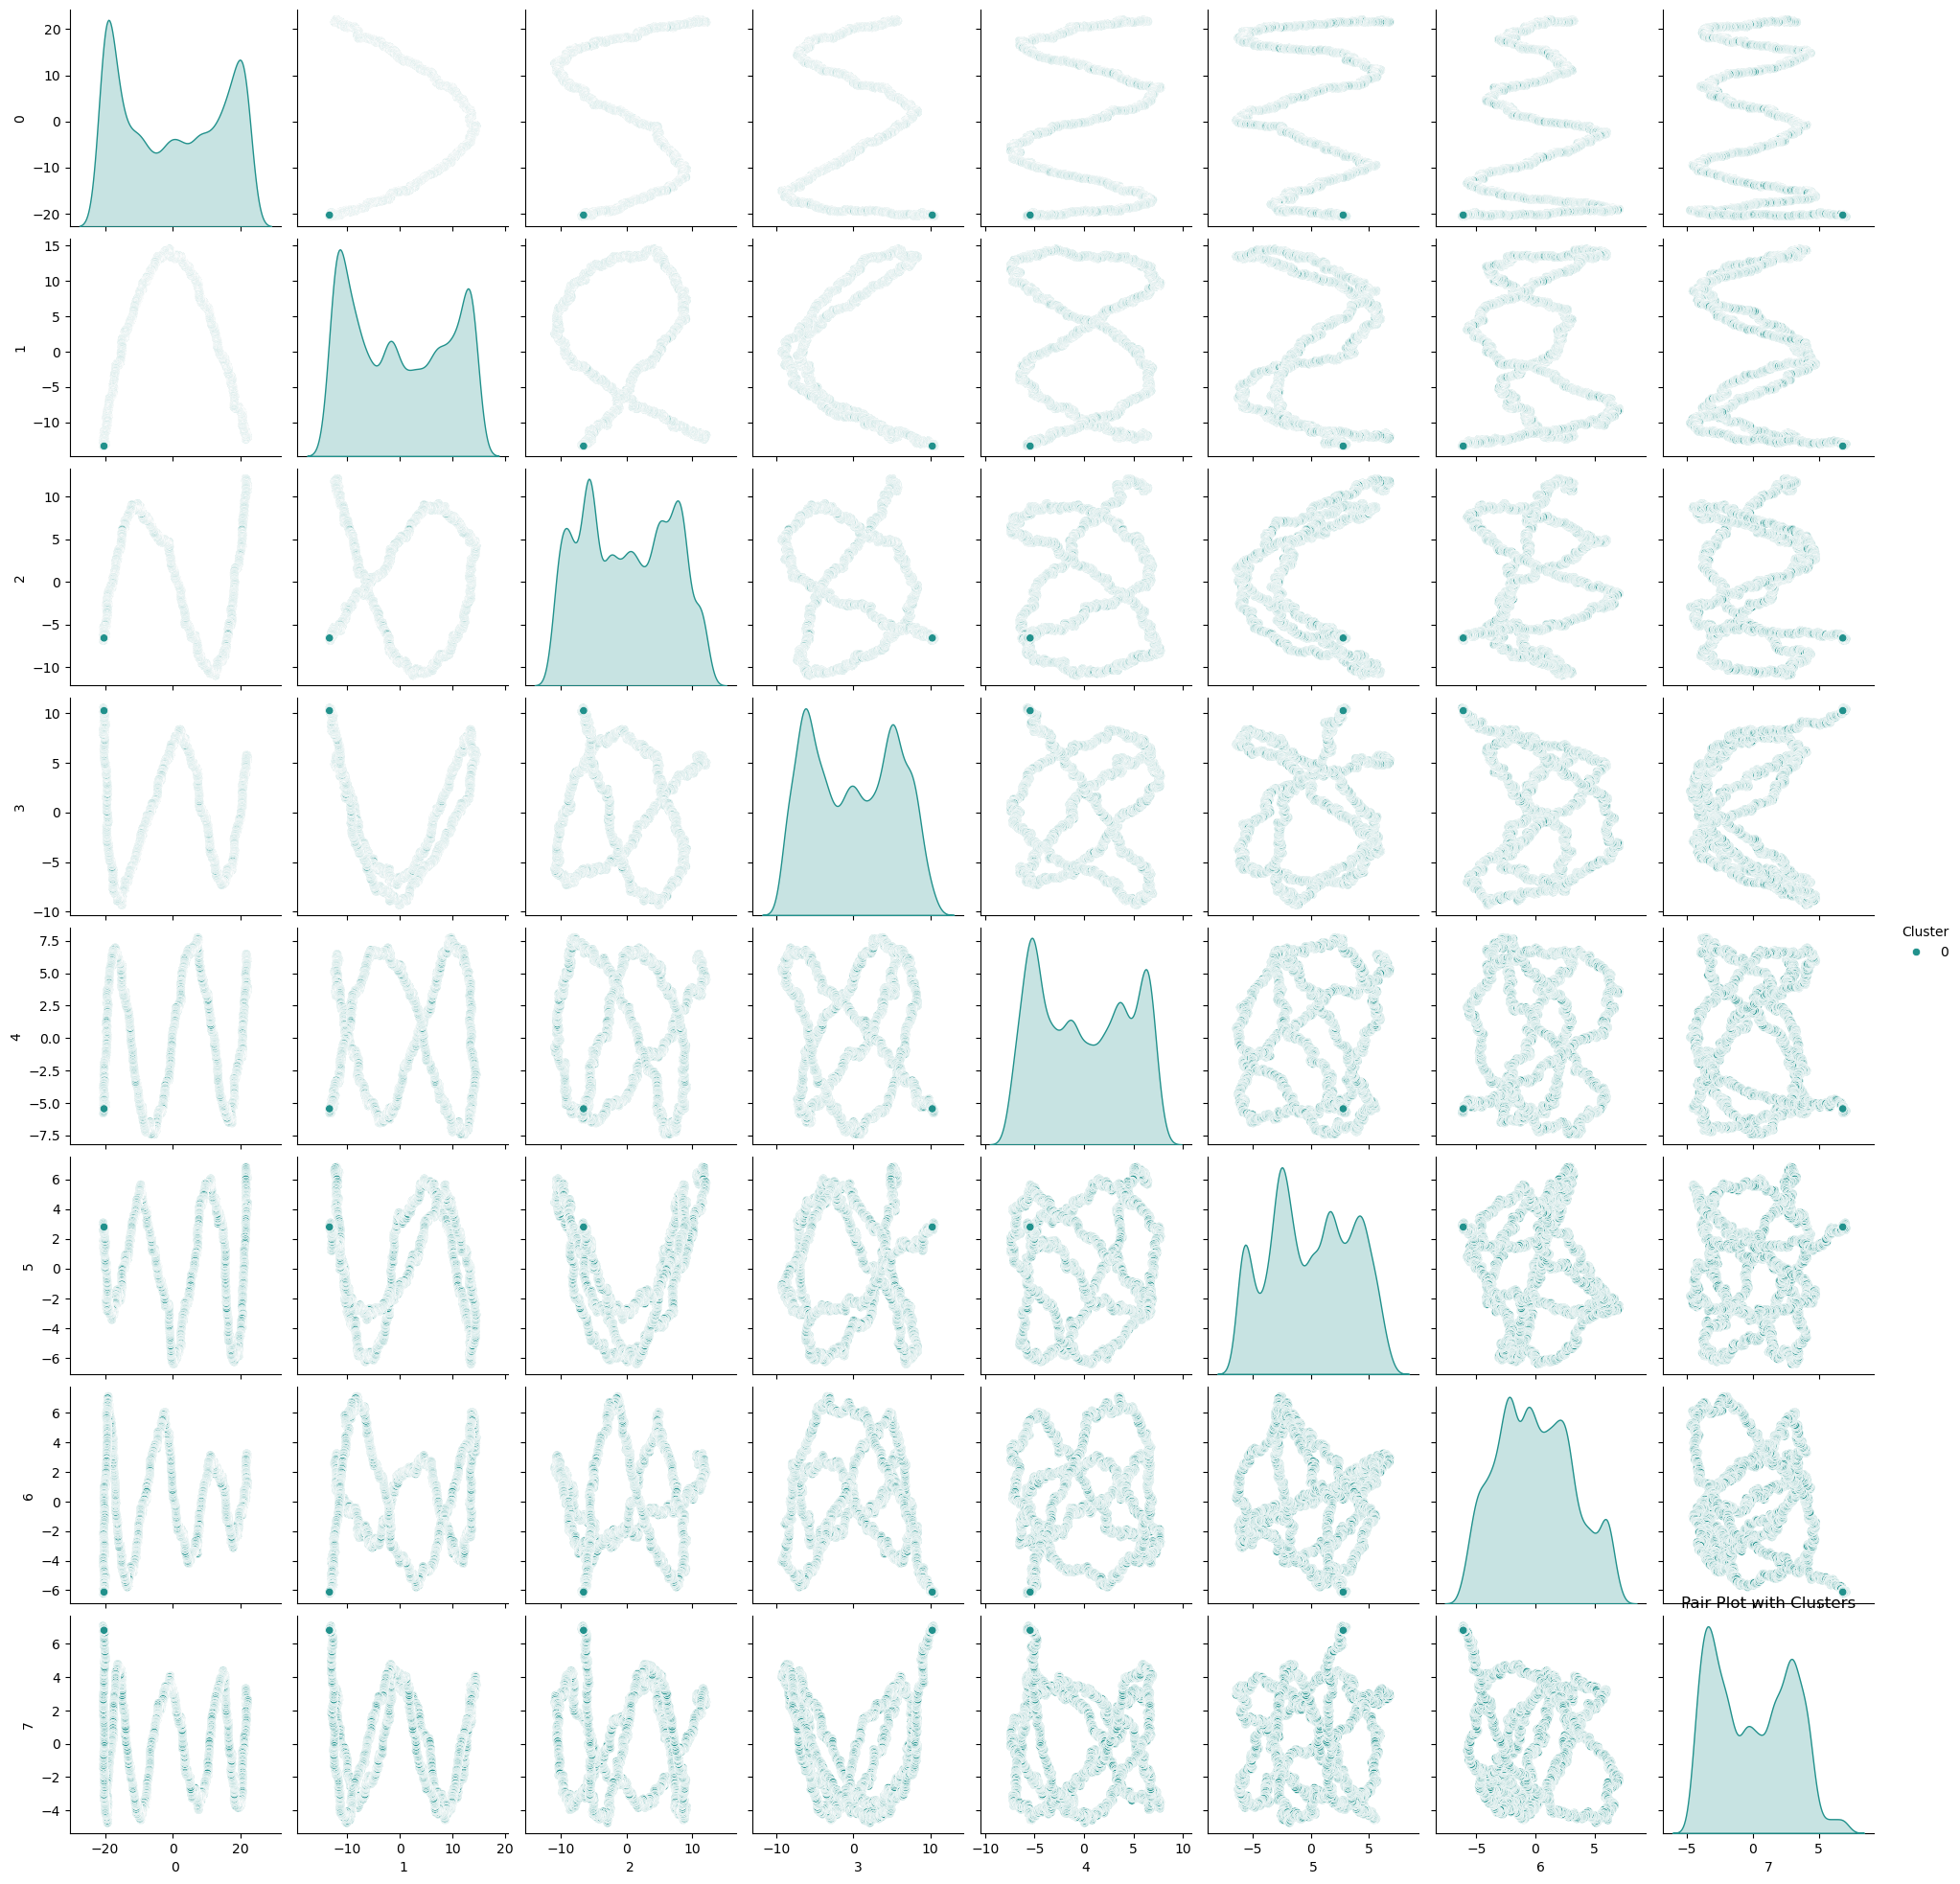

In [111]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Load the time series data
def load_data(file_paths):
    dfs = []
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dfs.append(df)
    return dfs

# Preprocess the data
def preprocess_data(dfs):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data #combined_df.values

# Perform PCA
def perform_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)
    return pca_result, pca.explained_variance_ratio_

# Perform DBSCAN clustering
def perform_dbscan(data, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    return clusters

# Visualize the clusters
# def visualize_clusters(pca_result, clusters):
#     plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     plt.title('DBSCAN Clustering of Time Series Data')
#     plt.colorbar(label='Cluster')
#     plt.show()

# Visualize the clusters
def visualize_clusters(pca_result, clusters):
    
    # Create pair plot
    df = pd.DataFrame(pca_result)
    df['Cluster'] = clusters
    #plt.subplot(1, 2, 2)
    sns.pairplot(df, hue='Cluster', palette='viridis')
    plt.title('Pair Plot with Clusters')
    plt.show()
    
# Main function
def main():
    import numpy as np
    # Load data
    file_paths = 'portfolio500.npy' # List of file paths for time series data
    data = np.load(file_paths)

    # Preprocess data
    scaled_data = preprocess_data(data)

    # Perform PCA
    pca_result, explained_variance_ratio_ = perform_pca(scaled_data, 8)
    print(explained_variance_ratio_)
    
    # Perform DBSCAN clustering
    clusters = perform_dbscan(pca_result, eps = 2)
    print(clusters)
    # Visualize the clusters
    visualize_clusters(pca_result, clusters)

if __name__ == "__main__":
    main()


In [104]:
# import numpy as np
# # Load data
# file_paths = 'portfolio500.npy' # List of file paths for time series data
# data = np.load(file_paths)

# # Preprocess data
# predata = preprocess_data(data)

# # Perform PCA
# pca_result = perform_pca(predata, 10)

# # Perform DBSCAN clustering
# clusters = perform_dbscan(pca_result, eps = 100)
# print(clusters)
# # Visualize the clusters
# visualize_clusters(pca_result, clusters)


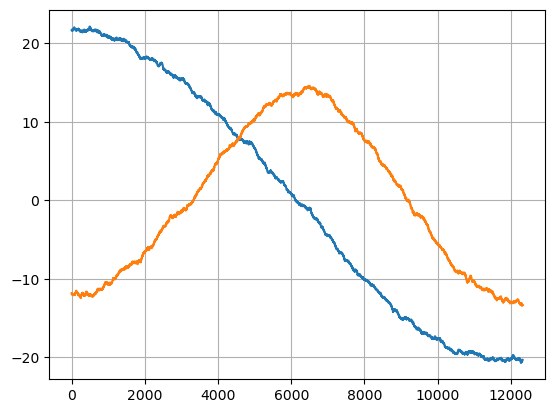

In [105]:
plt.plot(pca_result.T[0])
plt.plot(pca_result.T[1])
plt.grid()